# Accessing Argo data by date using Argopy

<img src="https://raw.githubusercontent.com/euroargodev/argopy/master/docs/_static/argopy_logo_long.png" alt="argopy" width="200"/> also allows to download and represente the data by date. In this notebook we show a few examples, but we refer to the [argopy Gallery](https://argopy.readthedocs.io/en/latest/gallery.html) for a more detailled explanation

Fist, as usual, import the libraries:

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

import xarray as xr
xr.set_options(display_expand_attrs = False)

Import argopy and set-up a data fetcher:

In [2]:
import argopy
from argopy.plot import scatter_map, scatter_plot  # Functions to easily make maps and plots

argopy.reset_options()
argopy.clear_cache()

You can load profiles for a specific date (and domain) using the ``region`` access point and specificating the region (-180, 180, -90, 90), the depth range (0, 100) and the date range ('2020-11-11', '2020-11-12')

In [3]:
with argopy.set_options(parallel=True):
    params = 'all'  # eg: 'DOXY' or ['DOXY', 'BBP700']
    f = argopy.DataFetcher(params=params)
    f = f.region([-180, 180, -60, 60,0, 100,'2011-11-11','2011-11-22'])
    f.load()

In [4]:
f

<datafetcher.erddap>
⭐ Name: Ifremer erddap Argo data fetcher for a space/time region
🗺  Domain: [x=-180.00/180.00; y=-60.00/60.00; z=0.0/100.0; t=2011-11-11/2011-11-22]
🔗 API: https://erddap.ifremer.fr/erddap
🏊 User mode: standard
🟡+🔵 Dataset: phy
🌤  Performances: cache=False, parallel=True [thread]

In [5]:
apDS = f.data

In [6]:
apDS

<xarray.Dataset> Size: 8MB
Dimensions:          (N_POINTS: 69276)
Coordinates:
    LATITUDE         (N_POINTS) float64 554kB -51.79 -51.79 -51.79 ... 44.7 44.7
    LONGITUDE        (N_POINTS) float64 554kB -162.0 -162.0 ... 179.0 179.0
    TIME             (N_POINTS) datetime64[ns] 554kB 2011-11-11T02:59:21 ... ...
  * N_POINTS         (N_POINTS) int64 554kB 0 1 2 3 ... 69272 69273 69274 69275
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int64 554kB 106 106 106 106 ... 126 126 126 126
    DATA_MODE        (N_POINTS) <U1 277kB 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION        (N_POINTS) <U1 277kB 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 554kB 5901691 5901691 ... 2900741 2900741
    POSITION_QC      (N_POINTS) int64 554kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 277kB 5.7 9.9 20.4 ... 89.7 94.1 99.4
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 277kB 0.01 0.01 0.01 ... 0.013 0.01 0.01
    PSAL_QC          (N_POINTS) int64 554kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 277kB 7.394 7.395 7.395 ... 11.14 10.57
    TEMP_ERROR       (N_POINTS) float32 277kB 0.002 0.002 0.002 ... 0.002 0.002
    TEMP_QC          (N_POINTS) int64 554kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 554kB 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes: (8)

note that the data is organized in 'points', a 1D array collection of measurements:

In [7]:
apDS.TEMP

<xarray.DataArray 'TEMP' (N_POINTS: 69276)> Size: 277kB
array([ 7.394,  7.395,  7.395, ..., 12.51 , 11.143, 10.566],
      shape=(69276,), dtype=float32)
Coordinates:
    LATITUDE   (N_POINTS) float64 554kB -51.79 -51.79 -51.79 ... 44.7 44.7 44.7
    LONGITUDE  (N_POINTS) float64 554kB -162.0 -162.0 -162.0 ... 179.0 179.0
    TIME       (N_POINTS) datetime64[ns] 554kB 2011-11-11T02:59:21 ... 2011-1...
  * N_POINTS   (N_POINTS) int64 554kB 0 1 2 3 4 ... 69272 69273 69274 69275
Attributes: (7)

However, and for the purpose of the Argo online school is easier to work with the data in [profiles](https://euroargodev.github.io/argoonlineschool/Lessons/L01_TheArgoProgram/Chapter14_OceanographicProfile.html); argopy allows the transformation:

In [8]:
data=apDS.argo.point2profile()
data

<xarray.Dataset> Size: 8MB
Dimensions:          (N_PROF: 3396, N_LEVELS: 99)
Coordinates:
  * N_PROF           (N_PROF) int64 27kB 2838 124 874 2061 ... 3350 1957 3176
  * N_LEVELS         (N_LEVELS) int64 792B 0 1 2 3 4 5 6 ... 93 94 95 96 97 98
    LATITUDE         (N_PROF) float64 27kB 29.51 -54.95 9.267 ... -52.37 43.28
    LONGITUDE        (N_PROF) float64 27kB -144.0 70.81 87.32 ... -138.6 7.668
    TIME             (N_PROF) datetime64[ns] 27kB 2011-11-11T00:06:10 ... 201...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int64 27kB 2 183 76 186 134 ... 137 233 19 198 192
    DATA_MODE        (N_PROF) <U1 14kB 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 14kB 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 27kB 5903597 1900927 ... 5901067 6900699
    POSITION_QC      (N_PROF) int64 27kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 1MB 6.2 9.5 19.4 ... nan nan nan
    ...               ...
    PSAL_ERROR       (N_PROF, N_LEVELS) float32 1MB 0.01 0.01 0.01 ... nan nan
    PSAL_QC          (N_PROF) int64 27kB 1 1 1 1 1 1 1 1 2 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 1MB 22.57 22.56 ... nan nan
    TEMP_ERROR       (N_PROF, N_LEVELS) float32 1MB 0.002 0.002 ... nan nan
    TEMP_QC          (N_PROF) int64 27kB 1 1 1 1 1 1 1 1 2 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int64 27kB 1 1 1 1 1 1 1 1 1 ... 2 1 1 1 1 1 1 1 1
Attributes: (8)

and we can plot all the profiles measured during this month:

/Users/pvb/miniconda3/envs/AOS/lib/python3.13/site-packages/argopy/plot/plot.py:489: UserWarning: More than one N_LEVELS found in this dataset, scatter_map will use the first level only
  warnings.warn(


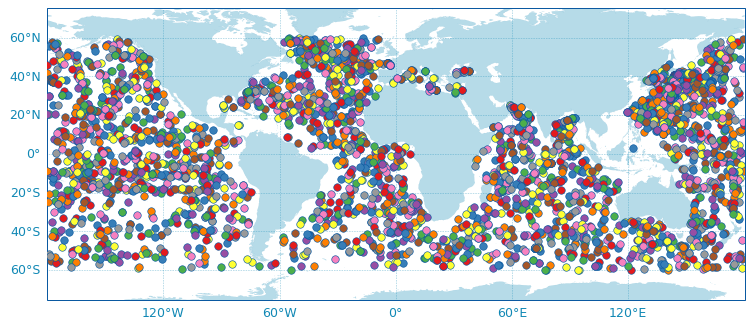

In [9]:
scatter_map(data,legend = False);

We can look at the upper 10db temperature values:

In [10]:
temp = apDS.where(apDS['PRES']<10)['TEMP']

In [11]:
lon=temp.LONGITUDE
lat=temp.LATITUDE

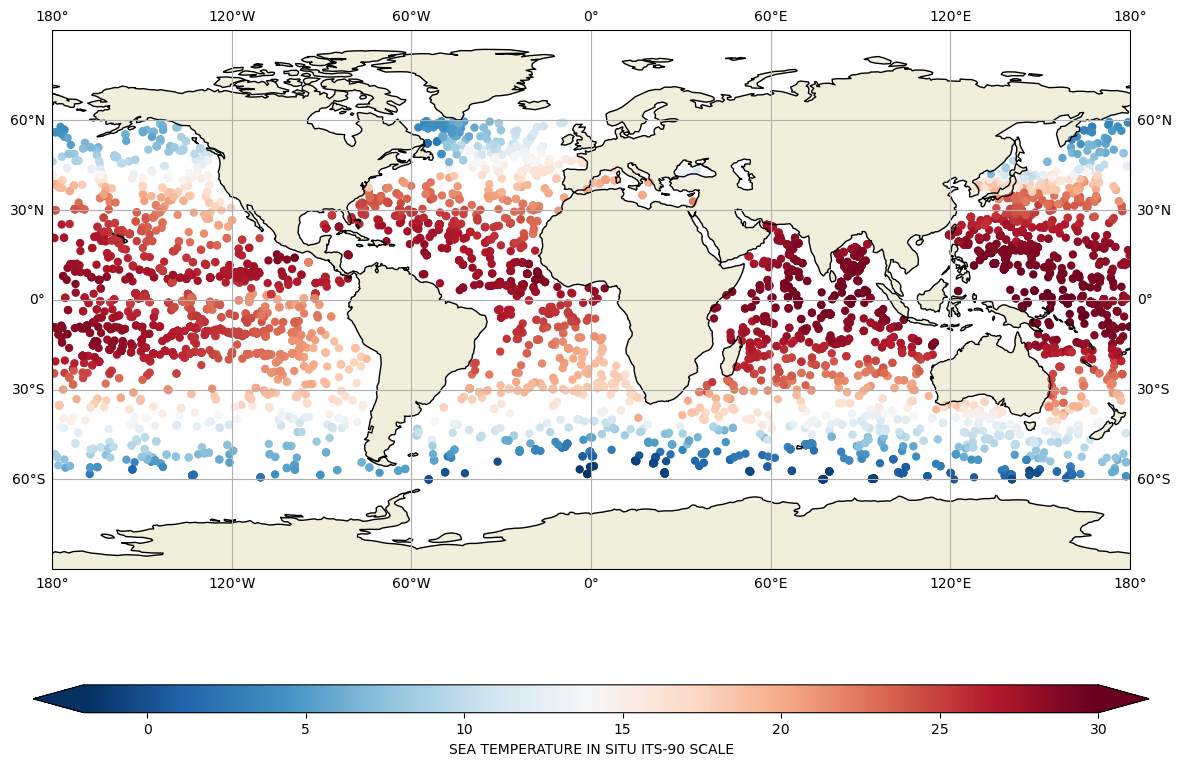

In [12]:
fig,ax = plt.subplots(figsize=(18,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# data for each basin
cs=ax.scatter(lon,lat,c=temp,cmap="RdBu_r",vmin=-2, vmax=30, edgecolor='none')

ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))
ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);

#colorbar
cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)
cbar.set_label(temp.long_name)